# INTRODUCTION

The goal of this project is to use aircraft safety data analysis to determine which planes are among the most secure options for a company's new aviation business. We can learn more about safety trends by examining a variety of factors, such as the make, model, and associated fatality data of the aircraft. Descriptive statistics and visualisations are used in this technique to find trends in accident data, which helps buyers of aircraft make informed choices. Prioritising safety and risk assessment, our actionable recommendations centre on data standardisation, outlier identification, and correlation analysis among various variables.

# 1.Business Understanding.

The company is looking to expand into the aviation industry because of the need to diversify the company's portfolio. The aim is to determine which aircraft presents the lowest risk and provide insights for informed purchasing decisions.

# 2.Data Understanding.

The data folder provided is from the National Transportation Safety Board which contains information on civil aviation accidents and selected incidents, from 1962 - 2023. The data also includes incidents from both the United States(US) and international waters. From the two datasets provided, the better option was AviationData.csv because compared to USState_Codes.csv the first one has more data quality compared to the latter which only contains two columns. As seen below through the df.info( ) function, the AviationData.csv contains 88,889 rows and 31 columns showing the column names, number of non-null values in each column and data type of each column. Given that several columns like latitude and longitude have missing values, it indicates the need of handling missing data during data cleaning. 

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/USER/Documents/aviationdataset/AviationData_Updated.csv", encoding='ISO-8859-1')

df.head ()


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# 3. Data preparation

In this section, there is preparation of the dataset for analysis by cleaning and organizing. This includes handling missing values, converting datatypes, filtering irrelevant columns and handling mixed data types thus making the data more accurate.

# Filter Data by Time Period or Condition

Understanding aviation incidents after 2000 is crucial for selecting low-risk aircraft for a new division. Examining current incidents helps identify common factors leading to mishaps and assesses the long-term performance of different aircraft models. This knowledge guides decision-making to select aircraft with minimal risk, meeting operational requirements, and a strong safety record.

In [ ]:
if 'Event.Date' in df.columns:
    df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')  
    recent_df = df[df['Event.Date'] >= '2000-01-01']

    print("\nFiltered Data from 2000 to 2023:")
    print(recent_df.head())  # Display the first few rows of the filtered data



Filtered Data from 2000 to 2023:
             Event.Id Investigation.Type Accident.Number Event.Date  \
47675  20001212X20407           Accident      MIA00LA063 2000-01-01   
47676  20001212X20327           Accident      ATL00FA019 2000-01-01   
47677  20001212X20383           Accident      LAX00LA063 2000-01-02   
47678  20001212X20382           Accident      LAX00LA062 2000-01-02   
47679  20001212X20364           Accident      FTW00LA067 2000-01-02   

              Location        Country Latitude Longitude Airport.Code  \
47675    HOMESTEAD, FL  United States      NaN       NaN          NaN   
47676    MONTEAGLE, TN  United States      NaN       NaN          NaN   
47677  VICTORVILLE, CA  United States      NaN       NaN          NaN   
47678    DOS PALOS, CA  United States      NaN       NaN          NaN   
47679      CORNING, AR  United States      NaN       NaN          NaN   

      Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
47675          NaN  ..

# Exploring Relevant Columns

This investigation looks at the connection between the kind of aircraft and fatal injuries, highlighting certain manufacturers such as Piper, Stinson, and Cessna. According to the data, 71,076 occurrences resulted in no fatalities, while a lesser number had one to four fatalities. This data is essential for evaluating safety performance and comprehending the hazards connected to particular manufacturers. By focussing on models with higher safety records, decisions on aircraft acquisitions can be informed by an analysis of this relationship.


In [ ]:
if 'Make' in df.columns:
    unique_causes = df['Make'].unique()
    print("Available Makes:")
    print(unique_causes)

if 'Total.Fatal.Injuries' in df.columns:
    aircraft_counts = df['Total.Fatal.Injuries'].value_counts()
    print("\nTotal.Fatal.Injuries:")
    print(aircraft_counts)


Available Makes:
['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']

Total.Fatal.Injuries:
0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64


# Handling Inconsistent Data in formatting.

In order to prevent formatting inconsistencies, the 'Location' column is standerdized in this stage by changing all of the entries to lowercase. This is significant because it guarantees precise location-based accident pattern analysis. The business challenge of how location affects safety evaluations for our aircraft choices is addressed when we have uniform data, which allows us to efficiently identify places with greater accident rates. We can make wise judgements to strengthen safety procedures and improve the wellbeing of passengers and crew by being aware of these trends.


In [ ]:
df['Location'] = df['Location'].str.lower()

print("First few rows after standardizing text column:")
print(df[['Location']])



First few rows after standardizing text column:
              Location
0      moose creek, id
1       bridgeport, ca
2        saltville, va
3           eureka, ca
4           canton, oh
...                ...
88884    annapolis, md
88885      hampton, nh
88886       payson, az
88887       morgan, ut
88888       athens, ga

[88889 rows x 1 columns]


# Converting data types

Processing errors can be caused during loading of the dataset where columns contain mixed data types. This can be fixed by specifying the data type during loading or converting the data afterward thus the columns remain consistent.

In [ ]:
df['Latitude'] = df['Latitude'].astype('str')
df['Longitude'] = df['Longitude'].astype('str')
df['Number.of.Engines'] = df['Number.of.Engines'].astype('str')
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype('str')
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype('str')
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype('str')
df['Total.Uninjured'] = df['Total.Uninjured'].astype('str')
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                 object
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries        

# Handling missing data values.

The foward fill method is used to fill in the missing values in the dataset. This method fills in missing spots with the last known value therefore not only does it keep our data consistent, but also in the time series data where there is need of a smooth flow of information.

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/USER/Documents/aviation dataset/AviationData.csv", encoding='ISO-8859-1')

df['Latitude'].fillna(0, inplace=True)
df['Longitude'].fillna(0, inplace=True)
df.fillna('unknown', inplace=True)
print("Missing values after filling:")
print(df.isnull().sum())

df.to_csv("C:/Users/USER/Documents/aviation dataset/AviationData_Updated.csv", index=False)

print("Missing values filled and data saved.")


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Missing values after filling:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64
Missing values filled and data saved.


# 4. Data Analysis

In this section, the numerical data is summarized by calculating key statistics such as mean, median, standard deviations which will help us understand the central tendency and spread of data as well as various other visualizations.

Key statistics for the columns are as follows:

*Number of engines
 1. Mean - The average number of engines per aircraft is 1.147
 2. Median (50%) - Most aircrafts have 1 engines.
 3. Range - Other aircrafts have 8 engines while some have 0.
 
*Total fatal injuries
 1. Mean - In a single accident there's bound to be 0.65 fatal injuries.
 2. Range - The maximum number of fatal injuries are 349 per accident thus leading to it being catastrophic.
 
*Total serious injuries
 1. Mean - There are 0.28 serious injuries per accident.
 2. Range - The maximum number of serious injuries per accident is 161.
 
*Total minor injuries
 1. Mean - There are 0.36 minor injuries on average.
 2. Range - Per accident, the maximum minor injuries in a single accident is 380.
 
*Total uninjured
 1. Mean - In the accidents, an average of 5.33 people were uninjured.
 2. Range - 699 individuals were uninjured in some accidents thus indicating high capacity flights where no one was injured.


In [ ]:
df.describe ()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,...,88889,88889,88889.0,88889.0,88889.0,88889.0,88889,88889,88889,88889
unique,87951,2,88863,14782,27759,220,25593,27157,10376,24872,...,27,13590,126.0,51.0,58.0,380.0,5,13,17076,2925
top,20001214X45071,Accident,GAA22WA241,1984-06-30,"ANCHORAGE, AK",United States,0,0,unknown,unknown,...,Personal,unknown,0.0,0.0,0.0,0.0,VMC,unknown,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,54507,54516,38640,36099,...,49448,72242,59675.0,63289.0,61454.0,29879.0,77303,27165,61754,17019


# Grouping the data (Aggregation)

In [ ]:
phase_counts = df.groupby('Make').size().reset_index(name='Count')
print(phase_counts)

                          Make  Count
0     107.5 Flying Corporation      1
1                         1200      1
2                    177MF LLC      1
3             1977 Colfer-chan      1
4                   1st Ftr Gp      1
...                        ...    ...
8232                  Zukowski      1
8233                     Zwart      1
8234              de Havilland      9
8235                     drone      1
8236                   unknown     64

[8237 rows x 2 columns]


The above features a variety of aircraft makes in the dataset each showing up different number of times. Some makes like unkown or special conversions done earlier rarely appear. This indicates they may be uncommon or just not well recorded. With this information, the makes often involved in incidents are determined as well as pointing out models that need more documentation. If a certain make is oftenly mentioned then it poses a potentially higher risk thus worth looking into its safety records.

# Sorting out the data

In [ ]:
# Ensure 'Total.Fatal.Injuries' is numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

# Sort the DataFrame by 'Total.Fatal.Injuries'
sorted_df = df.sort_values(by='Total.Fatal.Injuries', ascending=False)
print(sorted_df[['Make', 'Total.Fatal.Injuries']].head())



                   Make  Total.Fatal.Injuries
40881           Tupolev                 349.0
40882            Boeing                 349.0
75437            BOEING                 295.0
22082            Boeing                 270.0
51769  Airbus Industrie                 265.0


The sorted data above shows the aircraft makes that had the most fatal injuries recorder in the dataset. Boeing and Tupolev are at the top, both with 349 fatal injuries. This information shows the manufucturers might need closer examination regarding their safety records and type of incidents involving their aircraft.

# Visualizations

# Outliers

The box plot below represents a dataset related to fatal injuries. The box shows the middle 50% of the data (between the 25th and 75th percentiles). The whiskers extend to the minimum and maximum values within 1.5 times the IQR. There are several outliers on the higher end to which I will ignore, suggesting instances of unusually high fatal injuries.

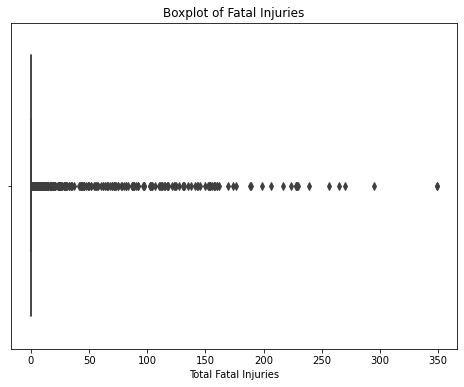

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Total.Fatal.Injuries' is numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Total.Fatal.Injuries')
plt.title('Boxplot of Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.show()


# Scatter Plot

This visualization shows the relationship between two variables in this case the correlation between fatal injuries and uninjured passengers in each accident.
The diagram below reveals accidents in most caseseither have a very few or no fatalities while the number of uninjured passengers vries widely. As fatalities increase, the vice versa occurs in the number of uninjured passengers which decreases. This shows more fatalities usually mean fewer uninjured passengers.

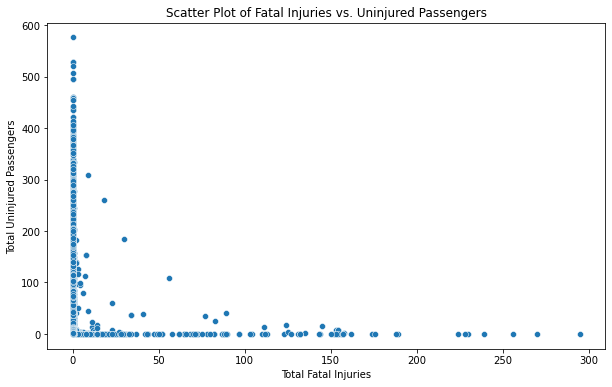

In [ ]:
# Ensure 'Total.Fatal.Injuries' and 'Total.Uninjured' are numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
df['Total.Uninjured'] = pd.to_numeric(df['Total.Uninjured'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total.Fatal.Injuries', y='Total.Uninjured')
plt.title('Scatter Plot of Fatal Injuries vs. Uninjured Passengers')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Uninjured Passengers')
plt.show()



# Histogram

This is useful to show the frequency distribution of a single variable like in this case number of fatal injuries. 
In the below diagram, there is a steep decline in frequency as number of fatalities increases.This means that severe accidents with a high number of fatalities are rare. It also shows the majority of accidents have zero or few fatal injuries as seen in the highest frequency around zero.

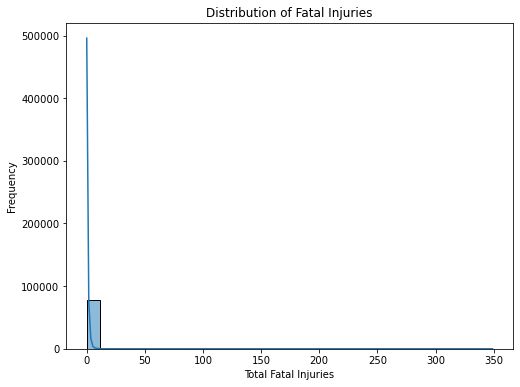

In [ ]:
# Ensure 'Total.Fatal.Injuries' is numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.histplot(df['Total.Fatal.Injuries'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.show()



# Heatmap of correlation matrix

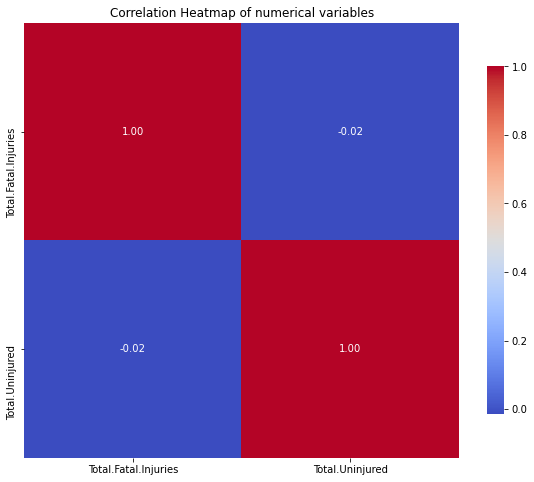

In [ ]:
# Ensure all columns used for correlation are numeric
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of numerical variables')
plt.show()



The heatmap above shows relationships between various numerical values related to the aircraft accidents. For example a strong correlation between total number of engines and total uninjured individuals suggests more engines may contribute to safer aircraft designs. This insights can guide decisions on aircraft purchases.